📊 Métricas registradas por tarea:
Tarea 0: Accuracy = 0.8388
Tarea 1: Accuracy = 0.8284


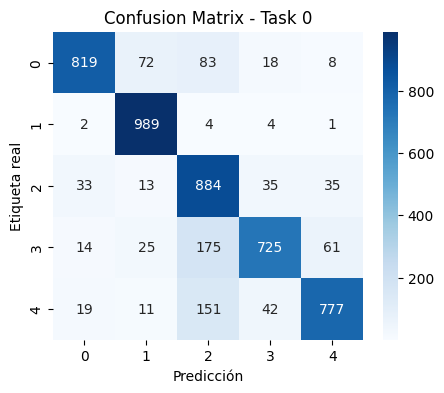

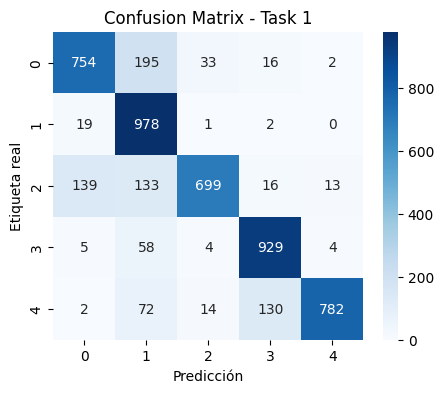

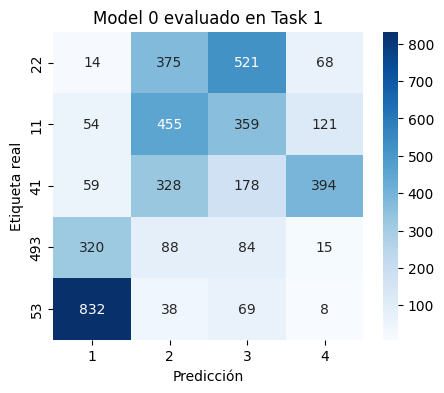

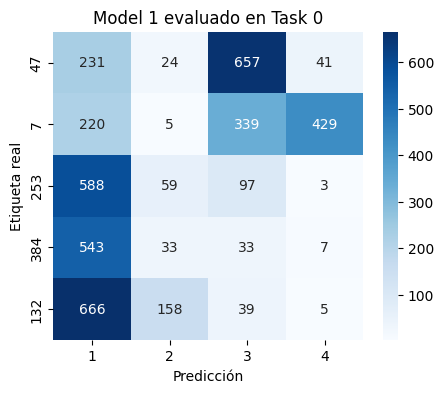

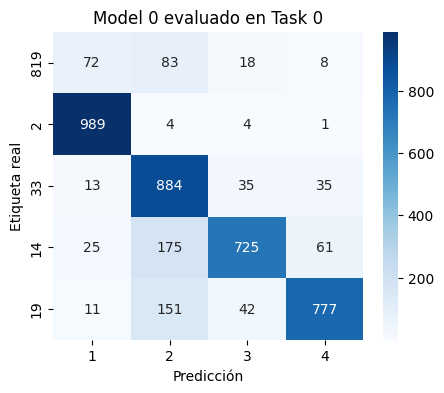

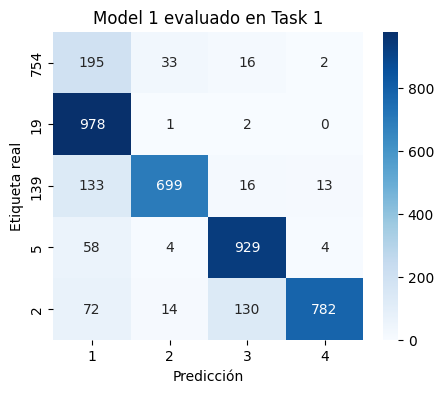

In [4]:
# Continual_Learning_Evaluation.ipynb

import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# Cargar métricas globales
with open("metrics.json", "r") as f:
    metrics = json.load(f)

print("📊 Métricas registradas por tarea:")
for task_data in metrics:
    print(f"Tarea {task_data['task']}: Accuracy = {task_data['accuracy']:.4f}")

# Mostrar matrices de confusión por tarea
def plot_confusion_matrix(path, title):
    df = pd.read_csv(path, index_col=0)
    plt.figure(figsize=(5, 4))
    sns.heatmap(df, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta real")
    plt.show()

plot_confusion_matrix("confmat_task0.csv", "Confusion Matrix - Task 0")
plot_confusion_matrix("confmat_task1.csv", "Confusion Matrix - Task 1")
# Nuevas matrices de confusión cruzadas

plot_confusion_matrix("confmat_model0_on_task1.csv", 
                      "Model 0 evaluado en Task 1")

plot_confusion_matrix("confmat_model1_on_task0.csv", 
                      "Model 1 evaluado en Task 0")

plot_confusion_matrix("confmat_model0_on_task0.csv", 
                      "Model 0 evaluado en Task 0")

plot_confusion_matrix("confmat_model1_on_task1.csv", 
                      "Model 1 evaluado en Task 1")



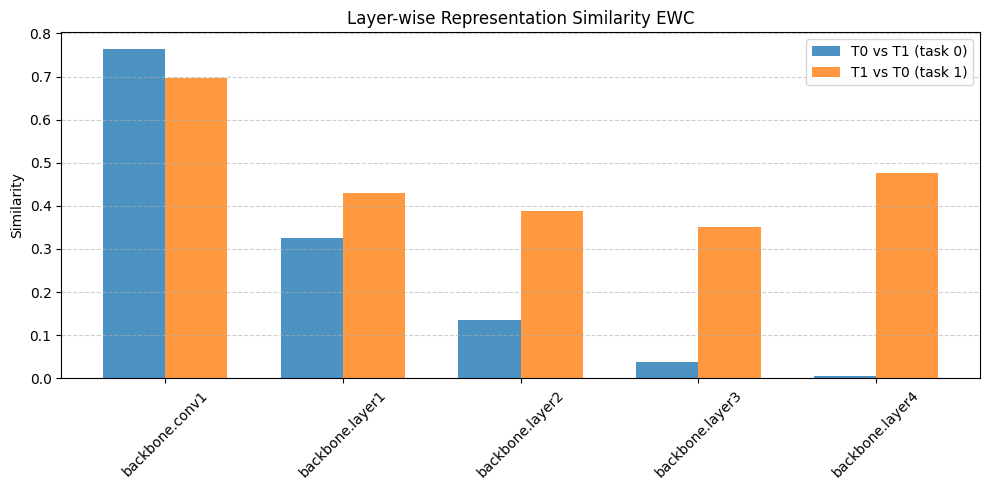

In [4]:
import json
import matplotlib.pyplot as plt

# Cargar archivos JSON
with open("sim_ewc_t0v1_task0.json") as f1, open("sim_ewc_t1_0v1.json") as f2:
    data1 = json.load(f1)
    data2 = json.load(f2)

# Extraer valores por capa
layers = list(data1["layers"].keys())
values1 = list(data1["layers"].values())
values2 = list(data2["layers"].values())

# Crear gráfico
x = range(len(layers))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar([i - width/2 for i in x], values1, width=width, label="T0 vs T1 (task 0)", alpha=0.8)
plt.bar([i + width/2 for i in x], values2, width=width, label="T1 vs T0 (task 1)", alpha=0.8)

plt.xticks(x, layers, rotation=45)
plt.ylabel("Similarity")
plt.title("Layer-wise Representation Similarity EWC")
plt.legend()
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
